Mean Squared Error: 0.9700462513210003


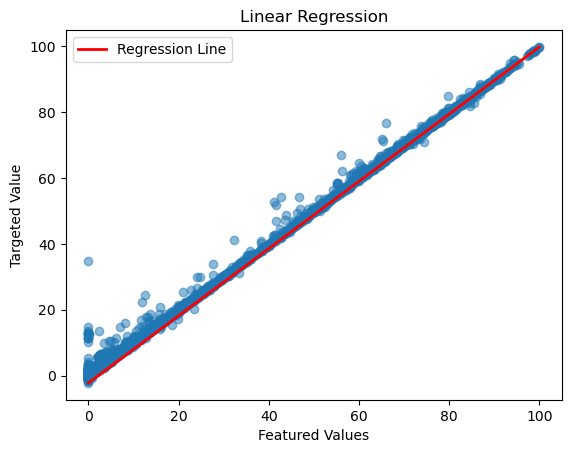

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

def normalize_feature(feature):
    return (feature - np.mean(feature)) / np.std(feature)

def linear_regression(X, y, learning_rate, epochs):
    m, n = X.shape
    X = np.column_stack((np.ones(m), X))  
    theta = np.zeros(n + 1)  

    for epoch in range(epochs):
        error = X @ theta - y
        gradient = (2/m) * X.T @ error
        theta = theta - learning_rate * gradient

    return theta

def predict(X, theta):
    m, n = X.shape
    X = np.column_stack((np.ones(m), X))  
    return X @ theta

def calculate_mse(y_true, y_pred):
    return np.mean((y_true - y_pred) ** 2)


file_path = "food.csv"
df = pd.read_csv(file_path)


features = [
    "Data.Alpha Carotene", "Data.Beta Carotene", "Data.Beta Cryptoxanthin",
    "Data.Carbohydrate", "Data.Cholesterol", "Data.Choline", "Data.Fiber",
    "Data.Lutein and Zeaxanthin", "Data.Lycopene", "Data.Niacin", "Data.Protein",
    "Data.Retinol", "Data.Riboflavin", "Data.Selenium", "Data.Sugar Total",
    "Data.Thiamin", "Data.Water", "Data.Fat.Monosaturated Fat", "Data.Fat.Polysaturated Fat",
    "Data.Fat.Saturated Fat", "Data.Fat.Total Lipid", "Data.Major Minerals.Calcium",
    "Data.Major Minerals.Copper", "Data.Major Minerals.Iron", "Data.Major Minerals.Magnesium",
    "Data.Major Minerals.Phosphorus", "Data.Major Minerals.Potassium", "Data.Major Minerals.Sodium",
    "Data.Major Minerals.Zinc", "Data.Vitamins.Vitamin A - RAE", "Data.Vitamins.Vitamin B12",
    "Data.Vitamins.Vitamin B6", "Data.Vitamins.Vitamin C", "Data.Vitamins.Vitamin E",
    "Data.Vitamins.Vitamin K"
]
target = "Data.Carbohydrate"  

X_values = df[features].values
y_values = df[target].values


X_values = np.apply_along_axis(normalize_feature, 0, X_values)

learning_rate = 0.01
epochs = 1000
theta = linear_regression(X_values, y_values, learning_rate, epochs)


predictions = predict(X_values, theta)


mse = calculate_mse(y_values, predictions)
print("Mean Squared Error:", mse)

plt.scatter(y_values, predictions, alpha=0.5)
plt.plot([min(y_values), max(y_values)], [min(predictions), max(predictions)], color='red', linewidth=2, label='Regression Line')
plt.xlabel('Featured Values')
plt.ylabel('Targeted Value')
plt.title('Linear Regression')
plt.legend()
plt.show()
